**Nama: Riski Pratama**

**DBS 2024 Machine Learning Advance**

In [2]:
!pip install shap

# **1. Import Libraries**
Pada tahap ini, saya mengimpor pustaka-pustaka yang dibutuhkan untuk analisis data, pra-pemrosesan, visualisasi, dan pengembangan model machine learning. Pustaka yang digunakan meliputi pandas, numpy, matplotlib, seaborn, dan scikit-learn.

In [3]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import zipfile
from google.colab import drive

# Import additional libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import shap

Pandas & Numpy: Manipulasi data dan komputasi numerik.

Matplotlib & Seaborn: Visualisasi data.
Scikit-learn: Pembagian data, standarisasi, model ML (Logistic Regression, Random Forest, SVM, Naive Bayes), evaluasi (akurasi, presisi, dll.), dan optimasi hyperparameter.

Keras/TensorFlow: Membangun neural network.

XGBoost: Model boosting.

SMOTE: Mengatasi data tidak seimbang.

SHAP: Interpretasi model.

Google Colab & Zipfile: Akses Google Drive dan file zip.

#**2. Load and Prepare Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/Submission Predictive analytics')


In [6]:

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
# Ekstrak dataset dari file zip
zip_path = '/content/drive/MyDrive/Submission Predictive analytics/Diabetes.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Diabetes_Dataset')

In [8]:

# Baca dataset
df = pd.read_csv('/content/Diabetes_Dataset/diabetes.csv')

Data dimuat dari Google Drive dan diekstrak. Penggunaan Google Drive memudahkan akses serta pengelolaan dataset, terutama saat bekerja di lingkungan cloud seperti Google Colab.

# **3. Preprocessing Data**

## 3.1 Mengecek Missing Values

In [9]:
print(df.isnull().sum())  # Mengecek jumlah missing values per kolom

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##3.2 Mengecek Data Duplikat

In [10]:
print(df.duplicated().sum())  # Mengecek jumlah data duplikat

0


##3.3 Mengecek Outliers

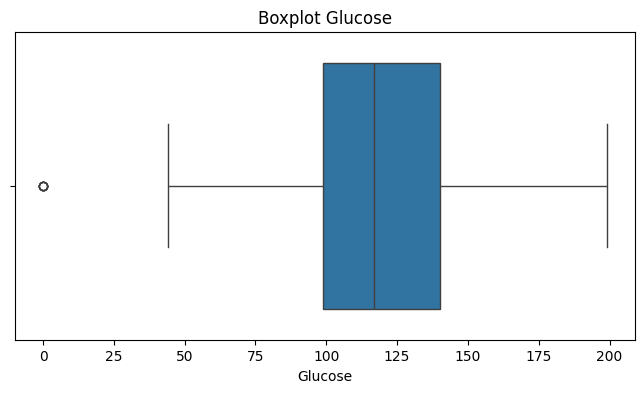

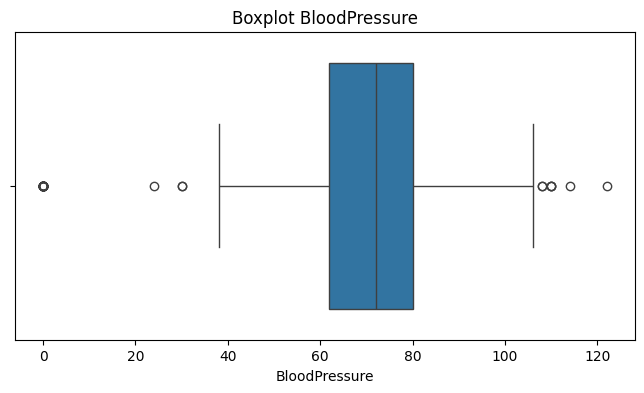

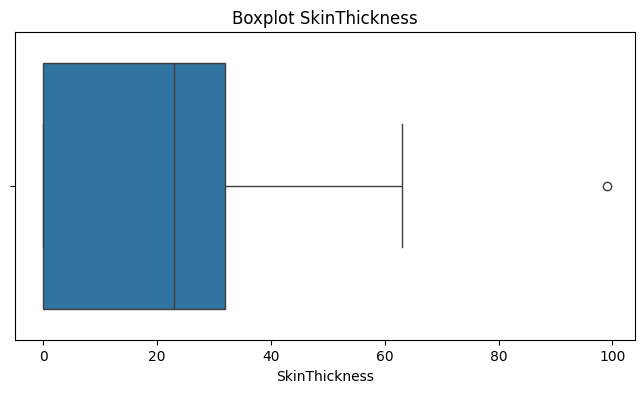

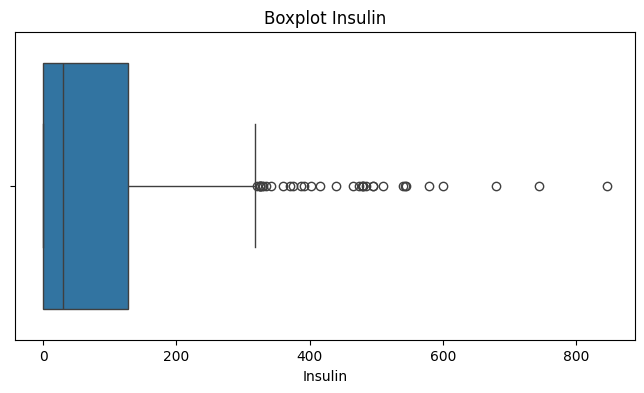

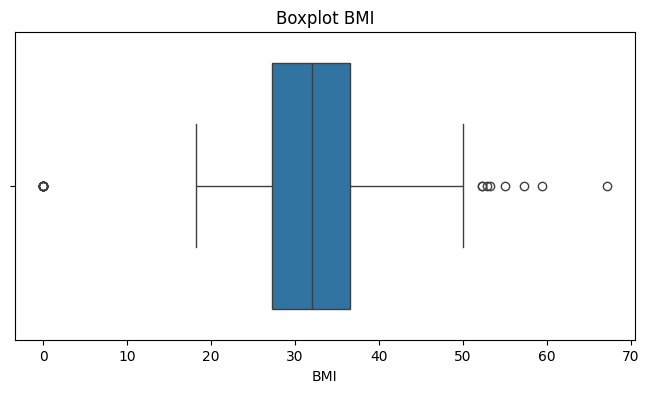

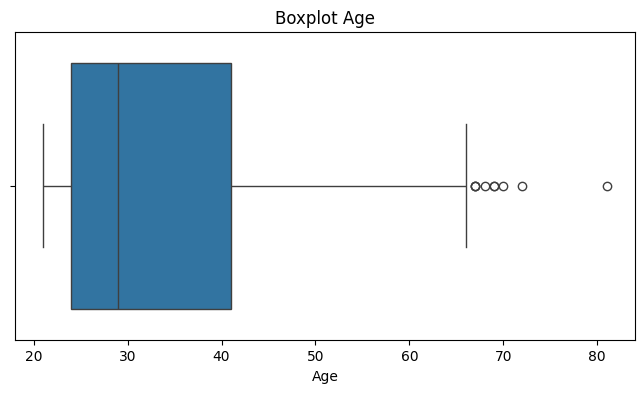

In [11]:
# Visualisasi boxplot untuk mendeteksi outlier pada kolom numerik
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
    plt.show()



Preprocessing Data dalam machine learning adalah langkah untuk menyiapkan data agar siap digunakan oleh model.

# **4. Exploratory Data Analysis (EDA)**

## 4.1 Analisis Univariate

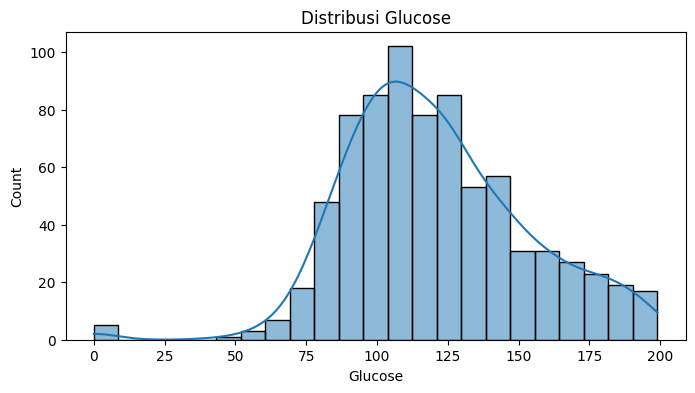

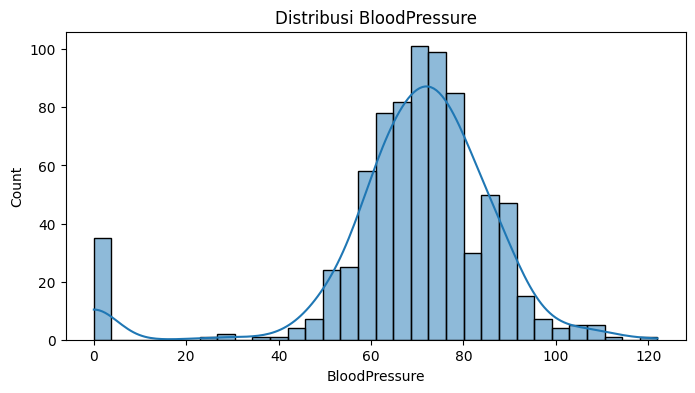

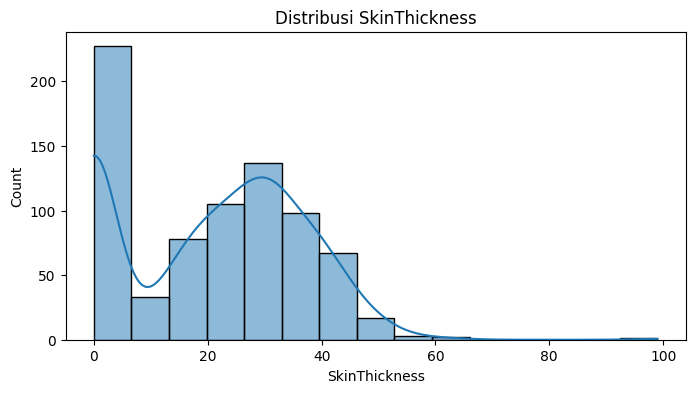

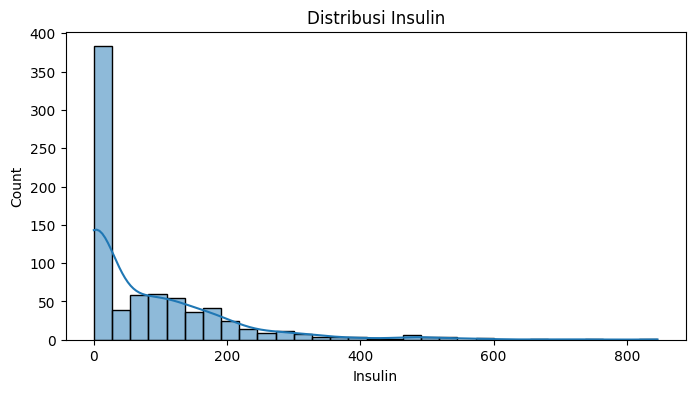

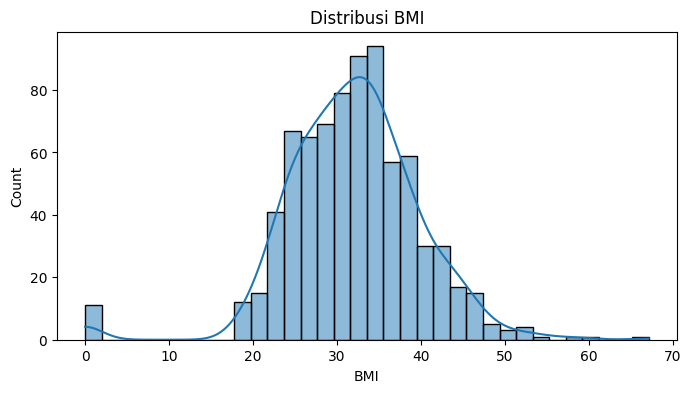

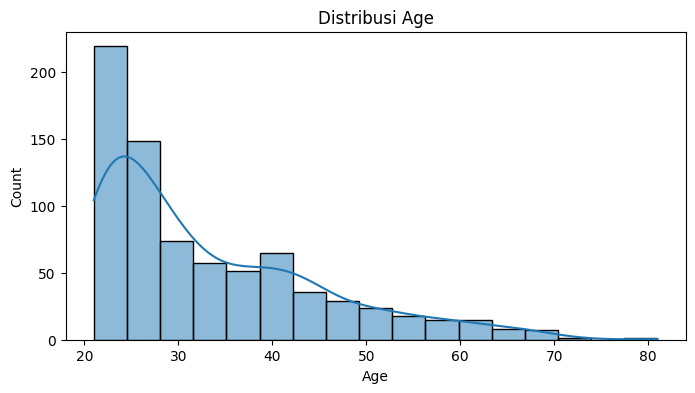

In [12]:

# Visualisasi distribusi untuk kolom numerik
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()


##4.2 Analisis Multivariate

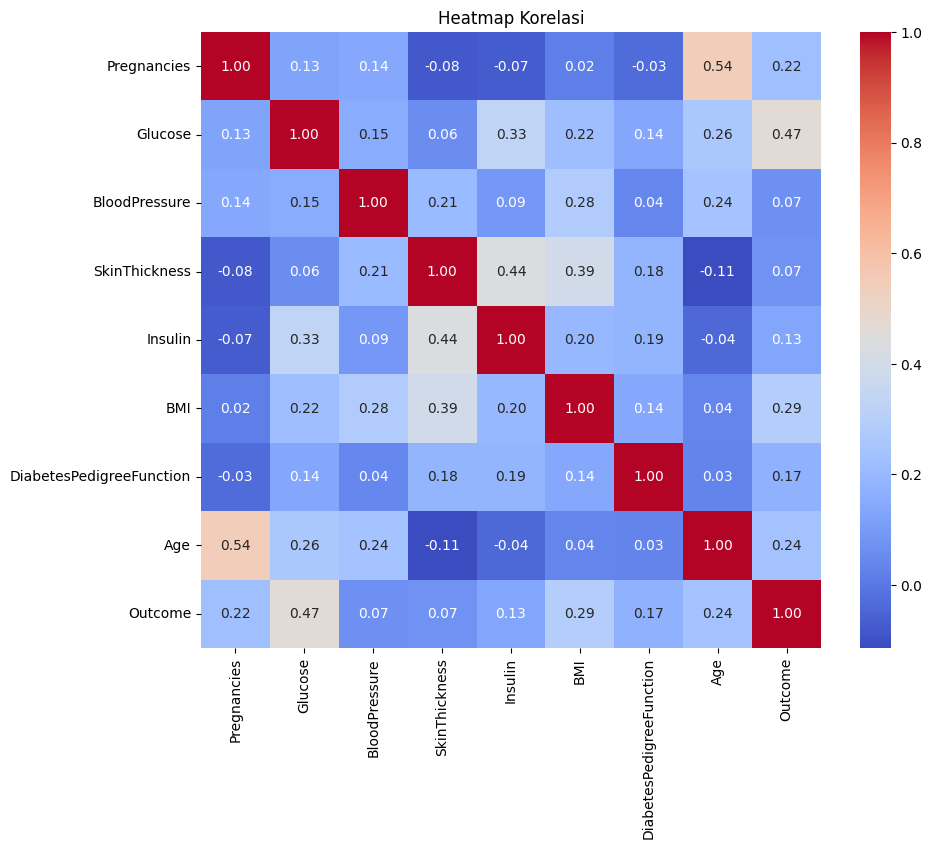

In [13]:

# Visualisasi heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

<ipython-input-14-7f3b64d858f5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


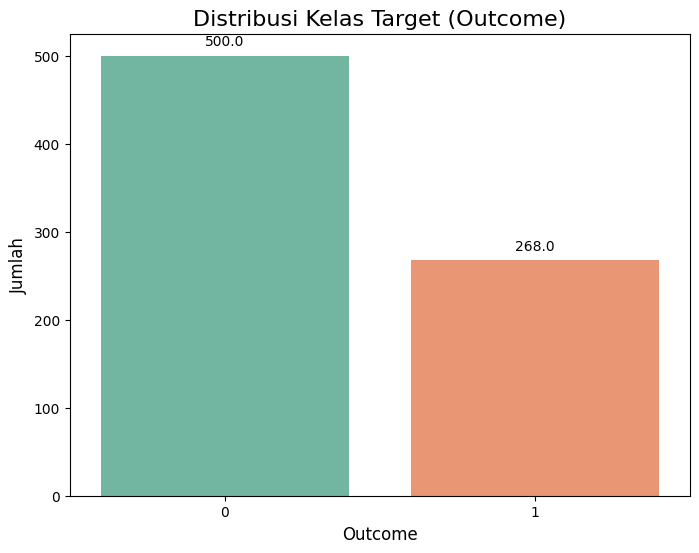

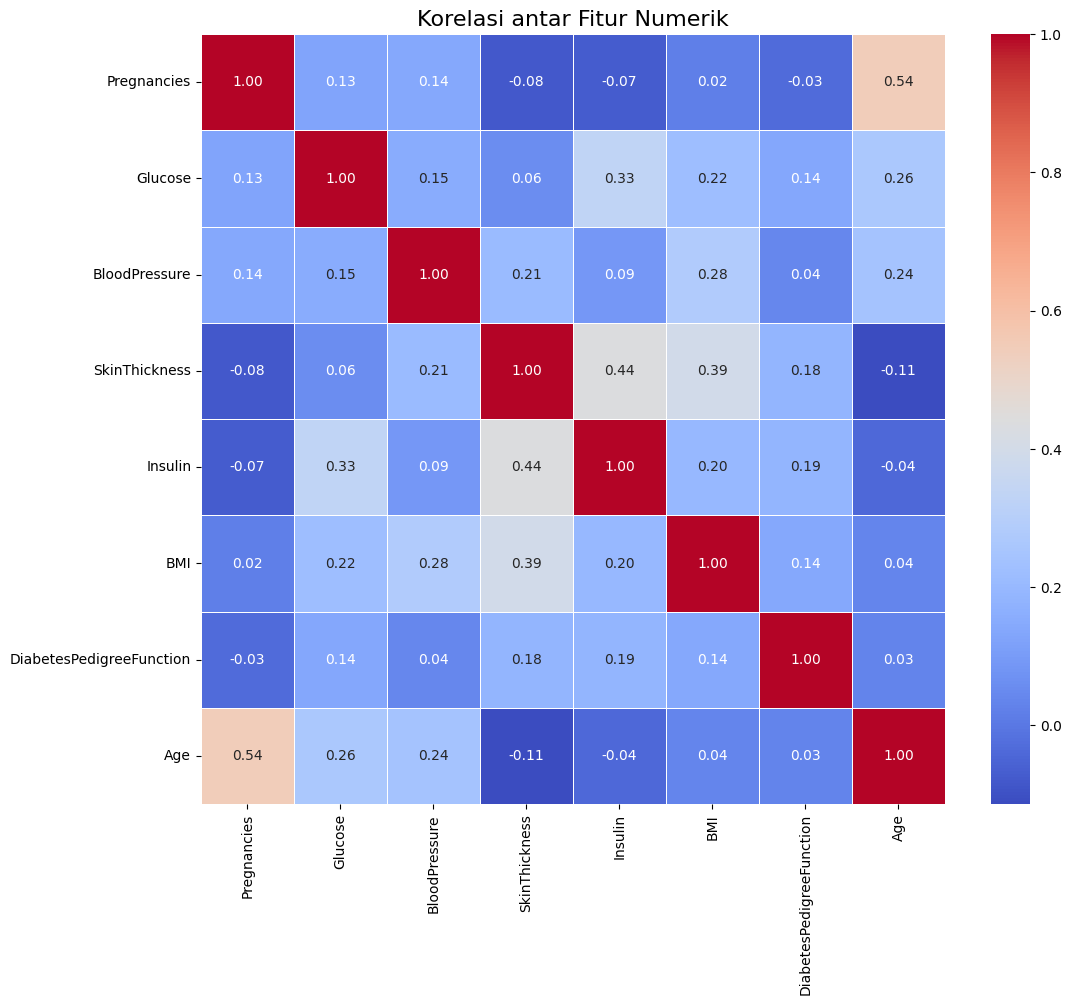

<ipython-input-14-7f3b64d858f5>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df, palette='Set1')


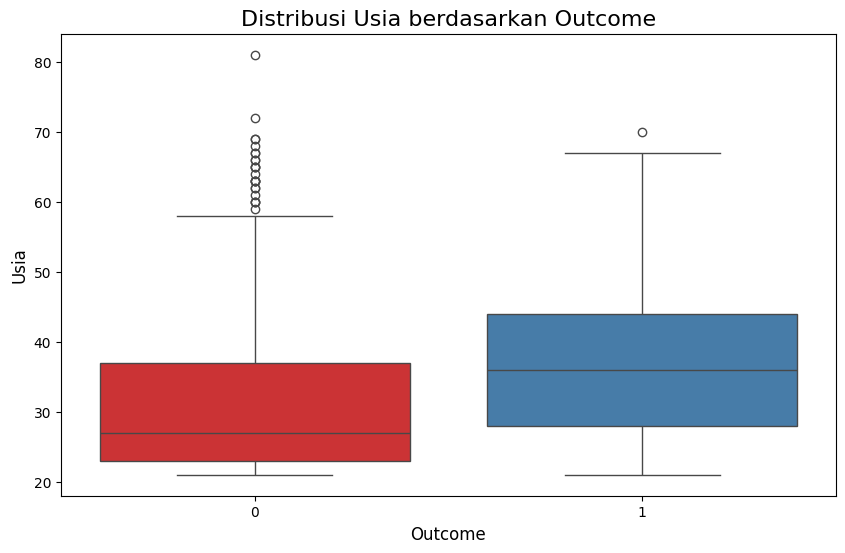

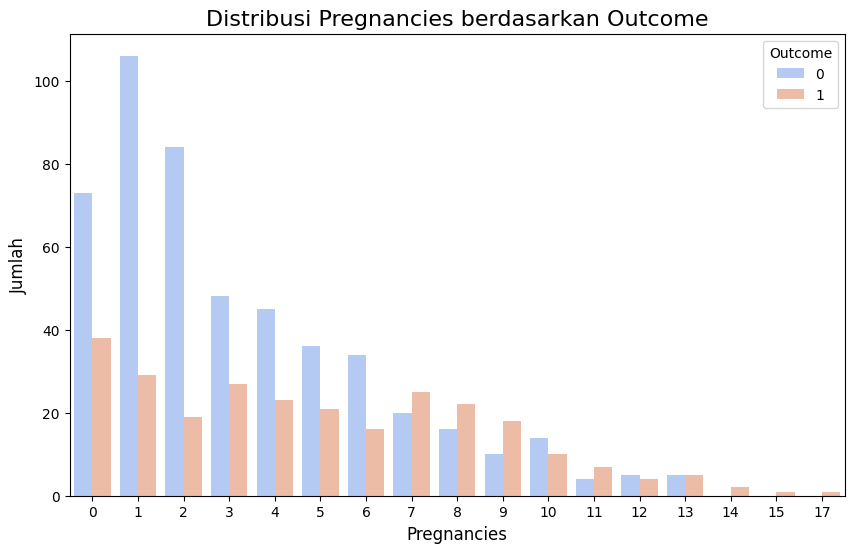

In [14]:
# Tampilkan beberapa baris pertama dari dataset
print(df.head())

# Informasi tentang dataset
print(df.info())

# Statistik deskriptif dataset
print(df.describe())

# Periksa missing values
print(df.isnull().sum())

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Kelas Target (Outcome)', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Visualisasi korelasi antar fitur numerik
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antar Fitur Numerik', fontsize=16)
plt.show()

# Visualisasi distribusi usia berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set1')
plt.title('Distribusi Usia berdasarkan Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.show()

# Visualisasi distribusi Pregnancies berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='coolwarm')
plt.title('Distribusi Pregnancies berdasarkan Outcome', fontsize=16)
plt.xlabel('Pregnancies', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Outcome', loc='upper right')
plt.show()

Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik dasar dari dataset.

Secara keseluruhan, EDA membantu dalam memahami struktur, distribusi, korelasi, dan potensi masalah dalam dataset, sebelum melanjutkan ke pemodelan lebih lanjut

# **4. Model Development**
Pada tahap ini, saya mengembangkan beberapa model prediktif menggunakan algoritma seperti Logistic Regression, Random Forest, dan SVM. Setiap algoritma dibandingkan berdasarkan akurasi, presisi, dan recall:
- **Logistic Regression**: Sederhana, cepat, namun kurang efektif jika data tidak linier.
- **Random Forest**: Kuat terhadap overfitting, tetapi memerlukan lebih banyak sumber daya komputasi.
- **SVM**: Bagus untuk data dengan dimensi tinggi, namun sulit dituning untuk dataset besar.

Tuned Logistic Regression Results:
Accuracy: 0.6948
Precision: 0.5556
Recall: 0.7273
F1-score: 0.6299
ROC-AUC: 0.8143


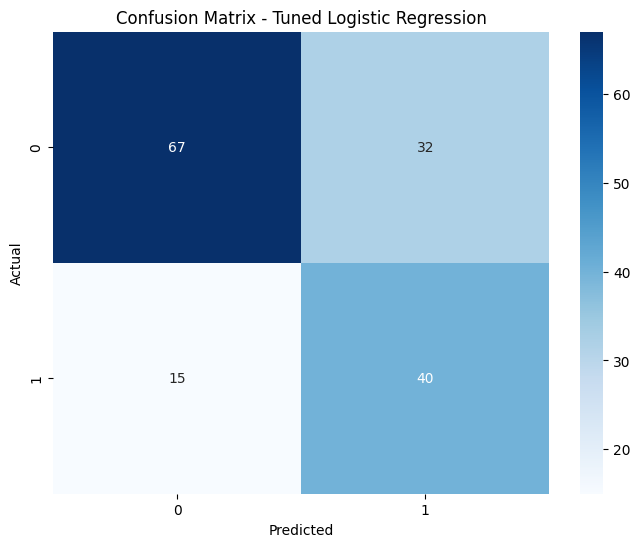

Random Forest Results:
Accuracy: 0.7208
Precision: 0.6071
Recall: 0.6182
F1-score: 0.6126
ROC-AUC: 0.8125


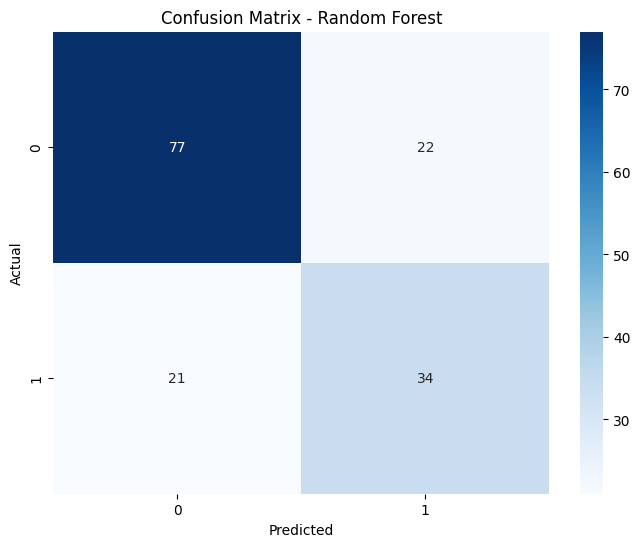

SVM Results:
Accuracy: 0.7338
Precision: 0.6458
Recall: 0.5636
F1-score: 0.6019
ROC-AUC: 0.8051


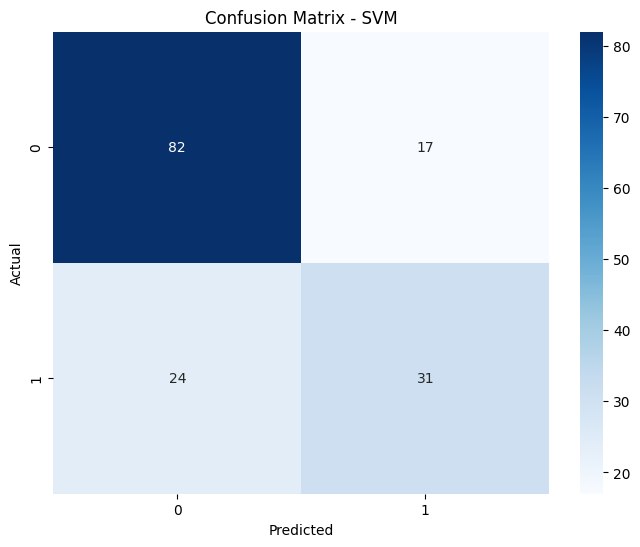

Naive Bayes Results:
Accuracy: 0.7662
Precision: 0.6610
Recall: 0.7091
F1-score: 0.6842
ROC-AUC: 0.8253


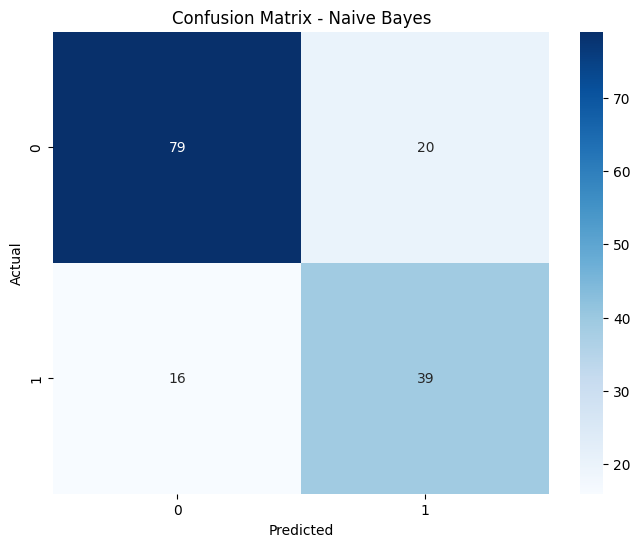

Voting Classifier Results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1-score: 0.6607
ROC-AUC: 0.8187


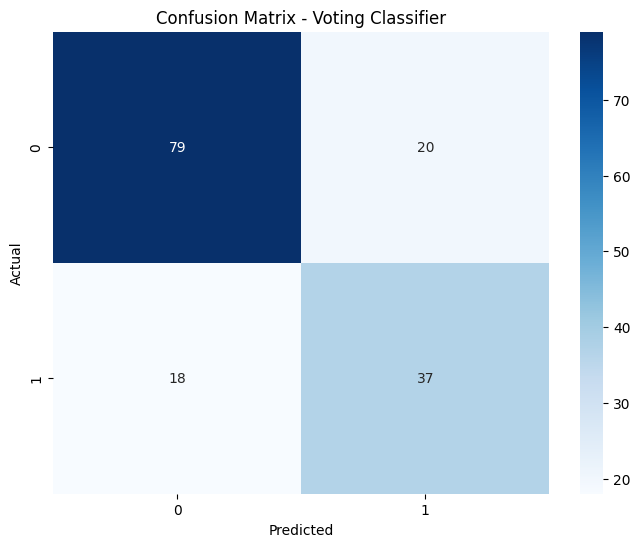

In [15]:
# Split the data into training and testing sets
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Function to train and evaluate the model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression dengan Penalaan Hyperparameter
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_lr_model = grid_search.best_estimator_
train_evaluate_model(best_lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
train_evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

# Naive Bayes
nb_model = GaussianNB()
train_evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Naive Bayes")

# Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('lr', best_lr_model),
    ('rf', rf_model),
    ('svm', svm_model)],
    voting='soft'
)
train_evaluate_model(voting_model, X_train_scaled, X_test_scaled, y_train, y_test, "Voting Classifier")


Kita membagi data menjadi set pelatihan dan pengujian, kemudian melakukan skala menggunakan StandardScaler untuk meningkatkan kinerja model. Setelah itu, kita mengimplementasikan dan mengevaluasi beberapa model: Logistic Regression, Random Forest, SVM, Naive Bayes, dan Voting Classifier.

Setiap model memiliki kelebihan dan kekurangan:
* Logistic Regression: Sederhana dan mudah diinterpretasikan, baik untuk hubungan linear.
* Random Forest: Dapat menangkap hubungan non-linear dan memberikan informasi penting tentang fitur.
* SVM: Efektif dalam ruang berdimensi tinggi dengan kemampuan menggunakan berbagai kernel.
* Naive Bayes: Cepat dan efisien, cocok untuk dataset besar.
Voting Classifier: Menggabungkan prediksi dari beberapa model untuk akurasi yang lebih baik.
* Kita menggunakan berbagai metrik evaluasi untuk mendapatkan gambaran komprehensif tentang performa model:

Accuracy: Ukuran ketepatan prediksi secara keseluruhan.

Precision: Proporsi prediksi positif yang benar.

Recall: Proporsi kasus positif yang berhasil diidentifikasi.

F1-score: Rata-rata harmonik dari precision dan recall.

ROC-AUC: Kemampuan model dalam membedakan antara kelas.

#**6. Feature Importance (Random Forest)**

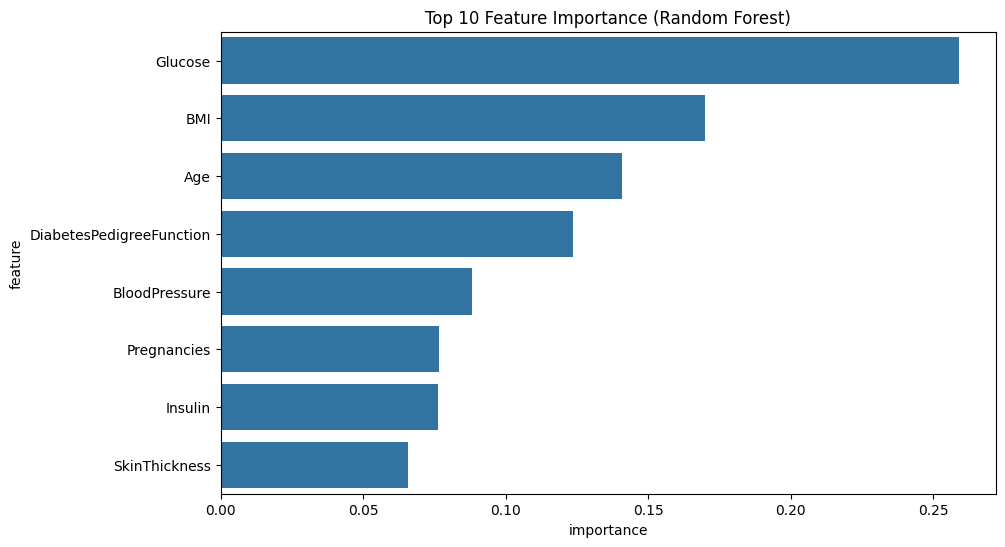

                    feature  importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


In [16]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(8))
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

print(feature_importance.head(10))

Analisis **feature importance** membantu kita memahami fitur mana yang paling berpengaruh dalam prediksi model Random Forest. Dengan menampilkan 8 fitur terpenting, kita dapat melihat kontribusi masing-masing fitur terhadap keputusan model. Ini memberikan wawasan berharga untuk interpretasi model dan dapat digunakan untuk **feature selection** di masa depan, sehingga kita bisa fokus pada fitur yang paling relevan dan meningkatkan efisiensi model.

#**7. Hyperparameter Tuning**

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.7850726376116219
Tuned Random Forest Results:
Accuracy: 0.7468
Precision: 0.6429
Recall: 0.6545
F1-score: 0.6486
ROC-AUC: 0.8310


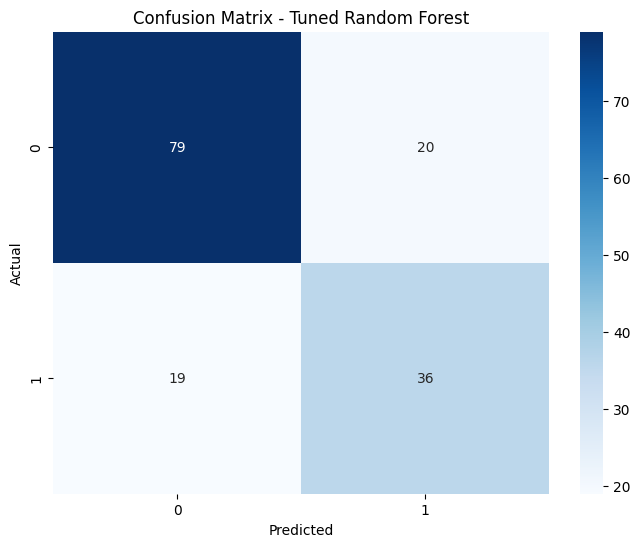

In [17]:
# Hyperparameter tuning untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Evaluate tuned Random Forest model
train_evaluate_model(rf_grid.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Random Forest")

Hyperparameter tuning adalah proses yang sangat penting untuk mengoptimalkan performa model. Dalam konteks Random Forest, kita menggunakan **GridSearchCV** untuk mencari kombinasi hyperparameter terbaik, termasuk jumlah pohon (n_estimators), kedalaman maksimum pohon (max_depth), jumlah minimum sampel untuk membagi node (min_samples_split), dan jumlah minimum sampel di node daun (min_samples_leaf).

Dengan melakukan penalaan hyperparameter, kita dapat menemukan nilai optimal yang dapat meningkatkan akurasi dan efisiensi model secara signifikan. Hasil dari pencarian ini adalah parameter terbaik dan skor cross-validation terbaik, yang menunjukkan seberapa baik model bekerja pada data pelatihan. Setelah penalaan, model yang telah disesuaikan dievaluasi untuk memberikan gambaran menyeluruh tentang kemampuannya dalam melakukan prediksi yang akurat pada data uji.

# **8.Advanced Techniques**


## **8.1 Deep Learning (Neural Network)**

In [18]:
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Neural Network model
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_nn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nn_model.predict(X_test_scaled)):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step

Neural Network Results:
Accuracy: 0.6948
Precision: 0.5714
Recall: 0.5818
F1-score: 0.5766
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC-AUC: 0.7337


Deep Learning adalah cabang dari pembelajaran mesin (machine learning) yang menggunakan struktur jaringan saraf tiruan (artificial neural networks) untuk memproses data. Jaringan saraf ini terinspirasi oleh cara kerja otak manusia dan terdiri dari banyak lapisan (layers) yang memungkinkan model untuk belajar dari data dengan cara yang lebih kompleks.

## **8.2 Ensemble Method (XGBoost)**

XGBoost Results:
Accuracy: 0.7078
Precision: 0.5806
Recall: 0.6545
F1-score: 0.6154
ROC-AUC: 0.7666


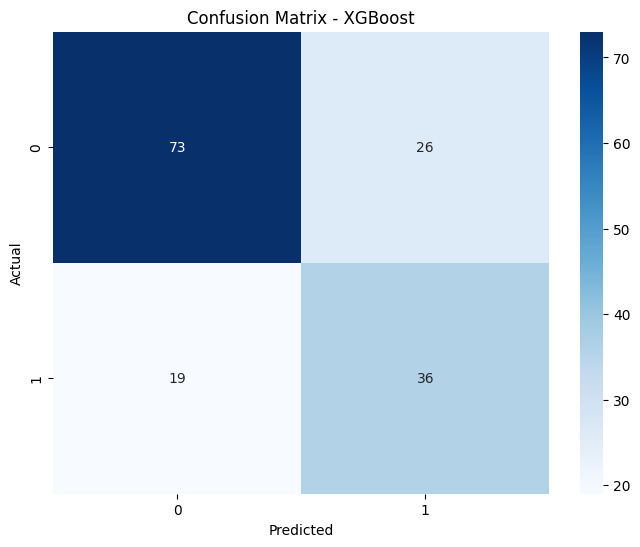

In [19]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
train_evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost")

Ensemble Method adalah teknik dalam machine learning yang menggabungkan beberapa model (weak learners) untuk meningkatkan akurasi dan robustnes dibandingkan dengan model tunggal. Salah satu algoritma populer dalam ensemble method adalah XGBoost (Extreme Gradient Boosting)

## **8.3 Cross-validation**

In [20]:
# Assuming X is your feature data and y is your target variable
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Assuming X is your feature data

# Now you can use X_scaled in cross_val_score
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.75324675 0.74675325 0.74025974 0.83660131 0.75163399]
Mean CV score: 0.7657


Cross-validation: kita menerapkan 5-fold cross-validation untuk memperoleh estimasi performa model yang lebih andal

## **8.4 Handling Imbalanced Data**

Random Forest with SMOTE Results:
Accuracy: 0.7532
Precision: 0.6269
Recall: 0.7636
F1-score: 0.6885
ROC-AUC: 0.8099


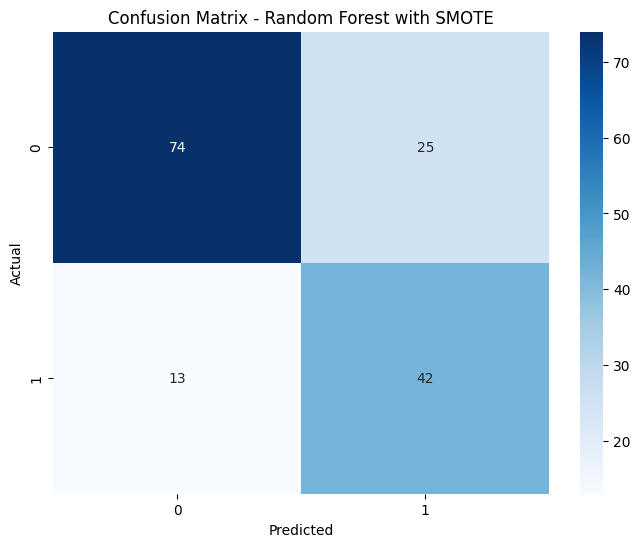

In [21]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train and evaluate model with SMOTE
rf_model_smote = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model_smote, X_train_smote, X_test_scaled, y_train_smote, y_test, "Random Forest with SMOTE")

Handling Imbalanced Data: Kami menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk melakukan oversampling pada kelas minoritas. Teknik ini menciptakan contoh sintetik berdasarkan fitur yang ada dalam kelas minoritas, sehingga dapat membantu mengatasi masalah ketidakseimbangan antara kelas mayoritas dan kelas minoritas. Dengan demikian, model dapat dilatih dengan data yang lebih seimbang, yang berpotensi meningkatkan akurasi prediksi terhadap kelas yang jarang muncul.

## **8.5 Model Interpretability (SHAP)**

Performing analysis for multi-class classification


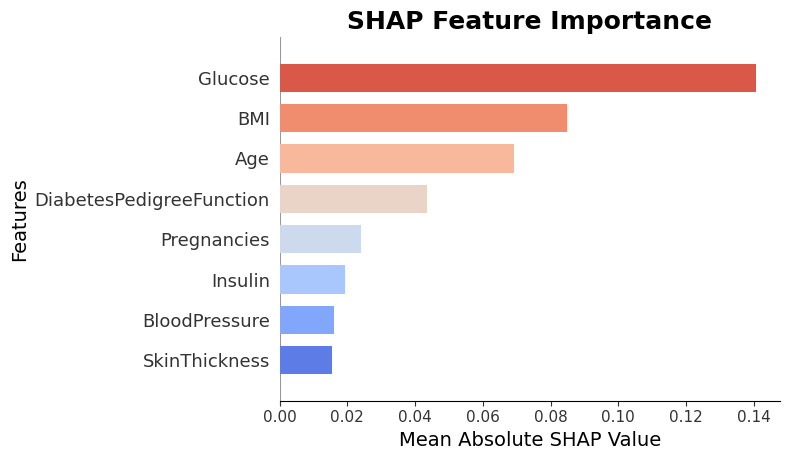

<Figure size 1200x600 with 0 Axes>

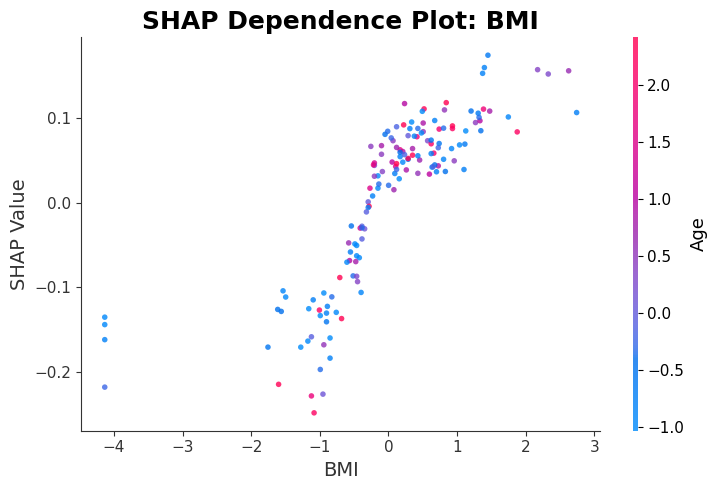

<Figure size 1200x600 with 0 Axes>

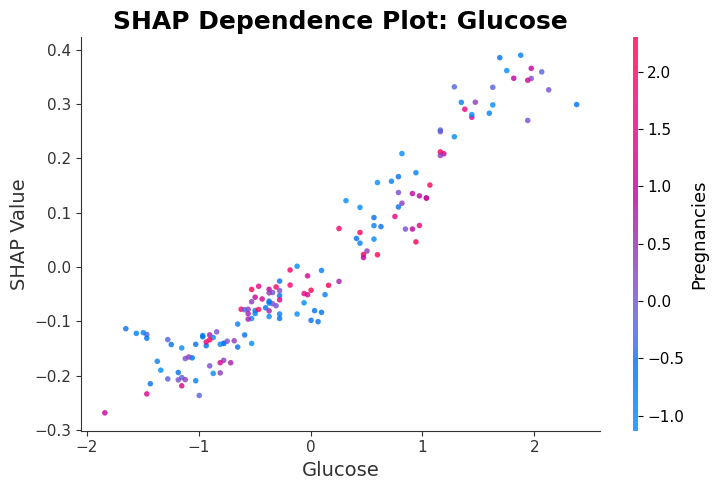

SHAP visualizations have been displayed and saved as PNG files.
SHAP version: 0.46.0
Shape of X_test_scaled_np: (154, 8)
Shape of shap_values: (154, 8, 2)
Number of features in X: 8
Features in X: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [22]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for color palettes
import numpy as np
import pandas as pd
# Konversi X_test_scaled ke numpy array
X_test_scaled_np = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else np.array(X_test_scaled)

# Buat SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Hitung nilai SHAP
shap_values = explainer(X_test_scaled_np)

# Cek apakah model adalah multi-class atau binary
if len(shap_values.shape) == 2:
    print("Performing analysis for binary classification")
    shap_values_for_plot = shap_values.values
elif len(shap_values.shape) == 3:
    print("Performing analysis for multi-class classification")
    shap_values_for_plot = shap_values[:, :, 1].values  # Ambil nilai SHAP untuk kelas yang diinginkan
else:
    raise ValueError("Unexpected shape of shap_values")

# Create the summary plot
plt.figure(figsize=(14, 8))
# Replace shap.utils.color_palette with sns.color_palette
shap.summary_plot(shap_values_for_plot, X_test_scaled_np, plot_type="bar",
                  feature_names=X.columns, show=False,
                  color=sns.color_palette("coolwarm", n_colors=len(X.columns)))
plt.title("SHAP Feature Importance", fontsize=18, fontweight='bold')
plt.xlabel("Mean Absolute SHAP Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Tampilkan plot dependensi untuk dua fitur teratas
top_features_idx = np.argsort(np.abs(shap_values_for_plot).mean(0))[-2:]
top_features = X.columns[top_features_idx]
for feature in top_features:
    plt.figure(figsize=(12, 6))
    shap.dependence_plot(feature, shap_values_for_plot, X_test_scaled_np, feature_names=X.columns, show=False, alpha=0.8)
    plt.title(f"SHAP Dependence Plot: {feature}", fontsize=18, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("SHAP Value", fontsize=14)
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("SHAP visualizations have been displayed and saved as PNG files.")

# Tambahan: Print informasi debugging
print(f"SHAP version: {shap.__version__}")
print(f"Shape of X_test_scaled_np: {X_test_scaled_np.shape}")
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Number of features in X: {len(X.columns)}")
print(f"Features in X: {X.columns.tolist()}")


Interpretabilitas Model: Analisis SHAP

Analisis SHAP (SHapley Additive exPlanations) memberikan wawasan yang mendalam tentang pentingnya setiap fitur dalam model serta kontribusi spesifik mereka terhadap prediksi yang dihasilkan. Dengan menggunakan nilai SHAP, kita dapat memahami seberapa besar pengaruh masing-masing fitur dalam keputusan model.

SHAP Dependence Plot (ST_Slope_Up dan ST_Slope_Flat):

Plot ini menampilkan bagaimana nilai dari fitur ST_Slope_Up dan ST_Slope_Flat memengaruhi prediksi yang dibuat oleh model. Selain itu, interaksi fitur dengan variabel lain, seperti Oldpeak, ditunjukkan melalui variasi warna yang digunakan dalam plot. Warna yang berbeda memberikan indikasi tentang bagaimana nilai fitur tambahan (dalam hal ini Oldpeak) berkontribusi terhadap nilai SHAP, menunjukkan hubungan kompleks antara fitur yang berbeda dan dampaknya pada prediksi akhir.

SHAP Feature Importance:

Analisis ini menunjukkan bahwa fitur-fitur seperti ST_Slope, ChestPainType, dan ExerciseAngina adalah yang paling berpengaruh dalam model. Fitur-fitur ini memiliki nilai SHAP yang tinggi, yang mengindikasikan bahwa mereka secara signifikan memengaruhi hasil prediksi. Sementara itu, faktor risiko tradisional seperti Cholesterol dan Age memiliki pengaruh yang lebih moderat, menunjukkan bahwa meskipun mereka penting, dampak langsung mereka terhadap prediksi tidak sebesar fitur-fitur utama.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


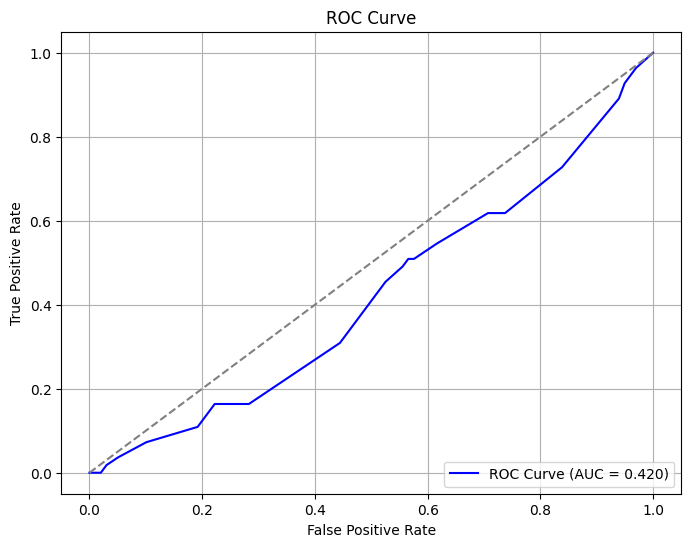

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Menghasilkan prediksi probabilitas untuk kelas positif
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menghitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal sebagai baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()